<a href="https://colab.research.google.com/github/JMML2021/0201-estructures_dades/blob/main/Sprint_7_Algoritmes_d%E2%80%99aprenentatge_supervisat_Classificacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [34]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Abro el fichero
 
path = ('/content/drive/MyDrive/01_COLAB/wineData.txt')

    
df=  pd.read_csv(path, sep=',', encoding="latin-1")
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')
df1=df.copy()
print('\nImprimo el primer registro, solo para ver como es:\n')
df1.iloc[0]

Hay  177 filas con 14 columnas

Imprimo el primer registro, solo para ver como es:



1           1.00
14.23      13.20
1.71        1.78
2.43        2.14
15.6       11.20
127       100.00
2.8         2.65
3.06        2.76
.28         0.26
2.29        1.28
5.64        4.38
1.04        1.05
3.92        3.40
1065     1050.00
Name: 0, dtype: float64

In [11]:
df1.summary()

AttributeError: ignored

In [14]:
#Let's import the data from sklearn
from sklearn.datasets import load_wine
wine=load_wine()

#Conver to pandas dataframe
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

#Check data with info function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [37]:
Nombre_Columnas  = ['target','alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']

In [38]:
# Asigno una lista con los nombres de las columnas

df1.columns = Nombre_Columnas
df1.iloc[0]

target                             1.00
alcohol                           13.20
malic_acid                         1.78
ash                                2.14
alcalinity_of_ash                 11.20
magnesium                        100.00
total_phenols                      2.65
flavanoids                         2.76
nonflavanoid_phenols               0.26
proanthocyanins                    1.28
color_intensity                    4.38
hue                                1.05
od280/od315_of_diluted_wines       3.40
proline                         1050.00
Name: 0, dtype: float64

In [39]:
# Search for missing, NA and null values)


(df1.isnull() | df1.empty | df1.isna()).sum()

target                          0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [40]:
df1.columns

Index(['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

# Data analysis
Basic statistical analysis

##Basic statistical analysis

In [41]:
#Let's show a summary of teh dataset where we can see 
# the basic statistic data.
df1.describe()

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000


In [44]:
#Let's see the frequency of the variable target.
#Convert variable to categorical.
data.target=data.target.astype('int64').astype('category')

#Frequency.
freq=df1['target'].value_counts()

freq

2    71
1    58
3    48
Name: target, dtype: int64

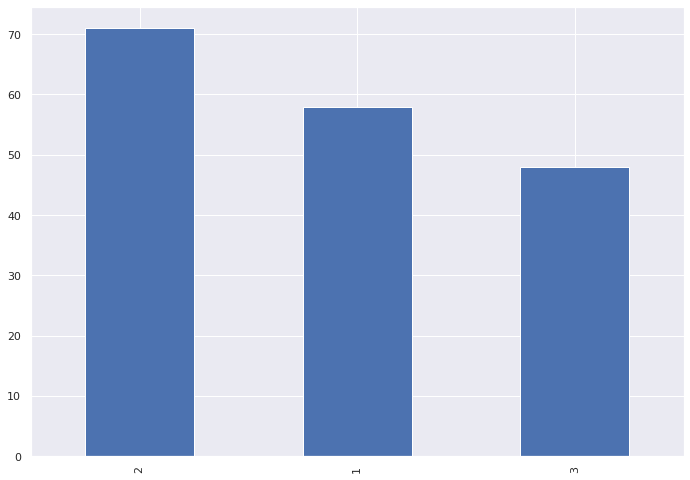

In [45]:
#Let's check graphically.
freq.plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1048ce55d0>,
      dtype=object)

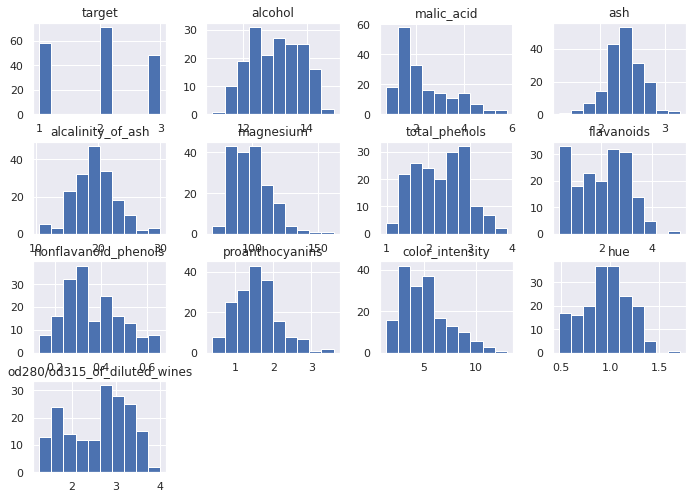

In [43]:
#Let's show the histograms of the variables alcohol, magnesium y color_intensity.
#Histogramas
 
df1[df1.columns].hist()

https://www.alldatascience.com/classification/wine-dataset-analysis-with-python/

En los puntos anteriores vemos como todas las variables del conjunto de datos, excepto la variable **target**, son numéricas continuas. 

No faltan valores en ninguna de las variables. De los valores estadísticos básicos podemos ver que ninguna de las variables sigue una distribución normal, ya que ninguna tiene media 0 y desviación estándar 1. 

En los histogramas podemos observar como la variable alcohol tiene una distribución más o menos centrada, con la mayoría de las registros que tienen valores entre 12 y 14 grados, en cuanto a color_intensity y magnesio, observamos que sus distribuciones están sesgadas a la izquierda.